In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_methods import *

This is the standard method to load the stock data DataFrame into a variable.


In [16]:
df = get_stock_prices_from_db()

Some of the stocks did not have complete data for all the date ranges, we can filter for only the complete stock list like this.


In [17]:
full_date_range_df = df.groupby("ticker").filter(
    lambda x: len(x) == EXPECTED_DF_LEN)

We can flip the DataFrame around a bit, to perform correlation analysis on the stocks.


In [18]:
prices_df = full_date_range_df.groupby("ticker")["price"]\
    .apply(lambda x: pd.Series(x.values))\
    .unstack()\
    .reset_index()\


price_series_df = pd.DataFrame(
    data=prices_df.iloc[:, 1:].to_numpy(
    ).T, columns=prices_df.iloc[:, 0].to_numpy()
)
price_series_df.head()

,A,AAPL,ABBV,ABT,ACM,ACN,ADBE,ADI,ADP,ADSK,...,WM,WMS,WSO,WST,XYL,ZBH,ZM,ZS,ZTO,ZTS
0,68.48,50.02,54.46,78.70,34.41,184.78,282.45,98.73,153.05,141.15,...,111.08,30.56,142.24,143.37,71.14,131.38,92.46,65.67,19.83,123.72
1,68.92,50.86,55.28,78.85,35.60,186.63,284.60,101.34,155.34,144.34,...,112.12,28.98,143.51,146.40,71.78,130.08,93.53,67.91,20.03,124.25
2,71.50,51.86,55.82,80.42,36.54,188.31,287.75,104.90,158.59,148.22,...,111.14,29.62,146.62,148.46,74.10,131.52,92.69,66.98,20.15,124.72
3,72.24,51.85,56.31,80.55,36.98,189.85,284.94,104.57,158.58,150.35,...,111.37,31.41,146.19,148.15,74.71,131.71,85.41,64.05,20.29,125.07
4,72.14,52.08,55.54,78.85,37.68,183.91,279.30,104.76,153.82,151.02,...,109.77,31.75,145.35,143.94,73.86,129.20,78.65,62.02,19.97,123.35


Not sure if we might want to highlight correlation in a visualization, but we can view it with this new DataFrame.


In [19]:
price_series_df.corr()

,A,AAPL,ABBV,ABT,ACM,ACN,ADBE,ADI,ADP,ADSK,...,WM,WMS,WSO,WST,XYL,ZBH,ZM,ZS,ZTO,ZTS
A,1.000000,0.800098,0.688503,0.859043,0.782768,0.880980,0.577667,0.845356,0.765348,0.573620,...,0.776691,0.835813,0.756268,0.811429,0.877666,0.164609,0.109892,0.764024,0.188332,0.815635
AAPL,0.800098,1.000000,0.840606,0.798911,0.869415,0.894580,0.477244,0.908743,0.813924,0.340292,...,0.871481,0.882010,0.941138,0.850970,0.666658,-0.000288,-0.075182,0.649427,0.160460,0.797138
ABBV,0.688503,0.840606,1.000000,0.544812,0.918432,0.692909,0.034107,0.820294,0.888248,-0.045159,...,0.885675,0.697856,0.798870,0.550919,0.439964,-0.236726,-0.428813,0.315315,-0.085614,0.507645
ABT,0.859043,0.798911,0.544812,1.000000,0.624410,0.893229,0.730089,0.738662,0.581322,0.677079,...,0.619099,0.835097,0.706921,0.883909,0.747332,0.251702,0.313622,0.880300,0.386094,0.894359
ACM,0.782768,0.869415,0.918432,0.624410,1.000000,0.783241,0.186681,0.927125,0.935182,0.106009,...,0.927261,0.778878,0.898804,0.631987,0.670124,0.004054,-0.363565,0.402097,-0.100463,0.603717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBH,0.164609,-0.000288,-0.236726,0.251702,0.004054,0.085900,0.417833,0.149679,-0.138035,0.581293,...,-0.117767,0.079655,0.128586,0.174722,0.437366,1.000000,0.511222,0.180835,0.247043,0.165951
ZM,0.109892,-0.075182,-0.428813,0.313622,-0.363565,0.001660,0.612348,-0.147956,-0.423963,0.762503,...,-0.389107,0.039742,-0.125415,0.224379,0.205542,0.511222,1.000000,0.411528,0.590492,0.213863
ZS,0.764024,0.649427,0.315315,0.880300,0.402097,0.834871,0.830422,0.567732,0.424051,0.762564,...,0.466865,0.772989,0.517982,0.851613,0.685803,0.180835,0.411528,1.000000,0.381764,0.881287
ZTO,0.188332,0.160460,-0.085614,0.386094,-0.100463,0.139736,0.518230,0.108341,-0.229399,0.569398,...,-0.162667,0.127028,0.110722,0.349823,0.126713,0.247043,0.590492,0.381764,1.000000,0.284037


In the following cell, I am testing each stock in the DataFrame for stationarity, this is done through the Augmented Dickey-Fuller unit root test. The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.


In [20]:

adf_df = pd.DataFrame()
adf_df["stationarity"] = price_series_df.apply(lambda x: adf_test(x)[1][1])
adf_df["is_stationary"] = adf_df["stationarity"] < 0.05
adf_df.index.rename("ticker", inplace=True)
adf_df = adf_df.reset_index()

adf_df.head()

,ticker,stationarity,is_stationary
0,A,0.303650,False
1,AAPL,0.521551,False
2,ABBV,0.565449,False
3,ABT,0.230930,False
4,ACM,0.752361,False


Below we are generating a filtered DataFrame which only contains the stocks which have passed the ADF Test for stationarity.


In [21]:
passed_adf_tickers = adf_df[adf_df["is_stationary"]
                            == True]["ticker"].to_numpy()
df[df["ticker"].isin(passed_adf_tickers)]

,id,ticker,sector,price,date
12072,12073,AMGN,healthcare,181.97,2019-09-03
12073,12074,AMGN,healthcare,182.68,2019-09-04
12074,12075,AMGN,healthcare,183.86,2019-09-05
12075,12076,AMGN,healthcare,183.93,2019-09-06
12076,12077,AMGN,healthcare,179.16,2019-09-09
...,...,...,...,...,...
287068,287069,CHKP,technology,131.94,2023-08-24
287069,287070,CHKP,technology,134.43,2023-08-25
287070,287071,CHKP,technology,133.73,2023-08-28
287071,287072,CHKP,technology,134.71,2023-08-29


In the following cell. I am testing for cointegration between stocks which have passed the ADF Test for stationarity. Unfortunately this runs in O(n^2), because the `coint` function provided by `statsmodel` only allows 1d arrays. I could not think of a better solution than to loop through all the columns with an inner and outer loop.

I was trying to find a vectorized implementation, to see if we could look produce a cointegration matrix similar to the correlation matrix, but was unable to find anything. In addition, I tried running this same code block with the entire set of stocks in the original DataFrame, but the execution time was taking over 20 minutes.

The result of this code block is a list of 27 stock pairings which have individually passed the ADF Test for stationarity, and together passed the `statsmodel` test for cointegration.


In [22]:
stock_set = set()
for t1 in passed_adf_tickers:
    for t2 in passed_adf_tickers:
        if t1 == t2:
            continue
        does_cointegrate, res = test_stock_cointegration(
            price_series_df[t1], price_series_df[t2]
        )
        if does_cointegrate:
            # print(f"Stock {t1} passes cointegration test with Stock {t2}")
            stock_set.add(','.join(sorted([t1, t2])))

coint_pairs_df = pd.DataFrame()
coint_stocks_list = list(map(lambda x: x.split(','), stock_set))
coint_pairs_df[['stock1', 'stock2']] = list(
    map(lambda x: x.split(','), stock_set))
coint_pairs_df

,stock1,stock2
0,BMRN,TEVA
1,TEVA,ZTO
2,CHKP,TEVA
3,BIIB,VRSN
4,AMGN,CHKP
5,BMRN,UAL
6,UAL,VRSN
7,NBIX,VRSN
8,AMGN,BDX
9,BA,UAL


In this cell, we are plotting the spread between any two stocks in the list above.


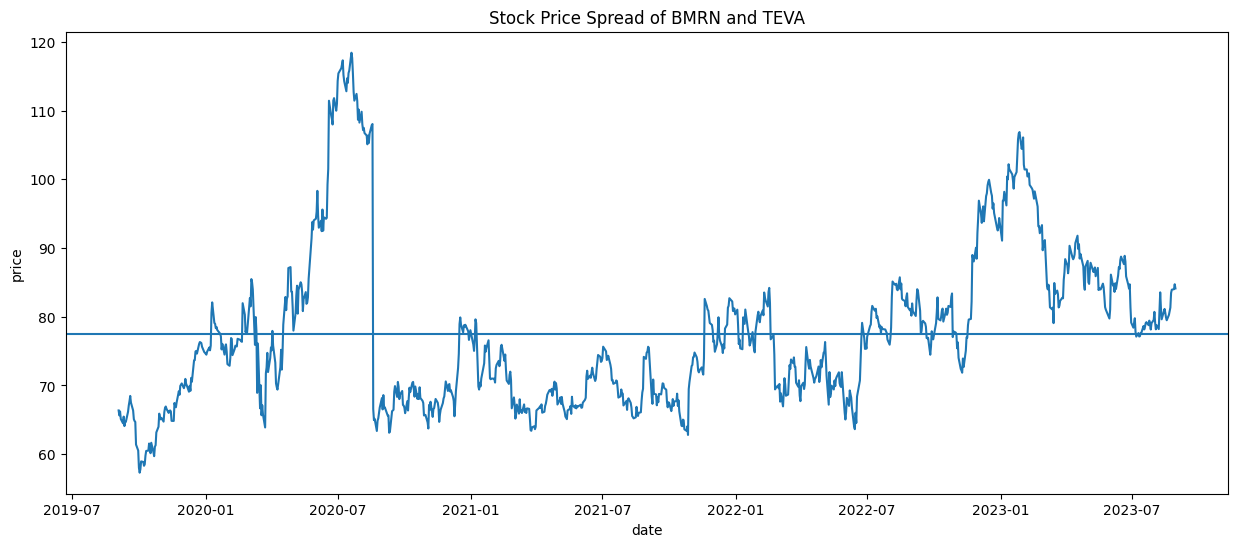

In [23]:
stock_pair_to_plot = 0

plt.figure(figsize=(15, 6))

for ticks in [coint_stocks_list[stock_pair_to_plot]]:
    stock1, stock2 = ticks
    spread = df[df["ticker"] == stock1]["price"].to_numpy(
    ) - df[df["ticker"] == stock2]["price"].to_numpy()
    plt.plot(df["date"].unique(), spread)
    plt.axhline(spread.mean())
    plt.xlabel('date')
    plt.ylabel('price')
    plt.title(f"Stock Price Spread of {stock1} and {stock2}")
    plt.show()